<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [265]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_EXPENDITURE_PER_STUDENT,TOTAL_REVENUE_PER_STUDENT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,7.279753,7.138417
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,12.079916,10.697044
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,7.096571,7.461789
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,7.203691,7.200305
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,9.595983,9.606578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,12.589755,12.389978
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,12.710424,12.784377
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,12.401341,12.442191
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,13.406246,13.503366


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math/Reading for 4/8 grade>** 


How many different years of data are in our dataset? Use a pandas function.

In [191]:
#print(df.YEAR.count() , "years are in our dataset.")
np.unique(df.YEAR).size

13

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [162]:
#df[df["STATE"] == "MICHIGAN"]
   
stateList = ["MICHIGAN"]
michigan = df[df.STATE.isin(stateList)].loc[:, ["AVG_READING_4_SCORE","AVG_READING_8_SCORE","AVG_MATH_8_SCORE","AVG_MATH_4_SCORE"]].mean().sum()

state2List = ["OHIO"]
ohio = df[df.STATE.isin(state2List)].loc[:, ["AVG_READING_4_SCORE","AVG_READING_8_SCORE","AVG_MATH_8_SCORE","AVG_MATH_4_SCORE"]].mean().sum()

if (ohio > michigan):
    print ("Ohio has the higher average outcome score across all years:" , ohio)
else: 
    print ("Michigan has the higher average outcome score across all years: " , michigan)


Ohio has the higher average outcome score across all years: 1020.2777777777778


Find the average for your outcome score across all states in 2019

In [165]:
yearList = [2019]
year = df[df.YEAR.isin(yearList)].loc[:, ["AVG_READING_4_SCORE","AVG_READING_8_SCORE","AVG_MATH_8_SCORE","AVG_MATH_4_SCORE"]].mean().sum()
print ("The average for the outcome score across all states in 2019 is" , year)

The average for the outcome score across all states in 2019 is 1003.566037735849


Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [175]:
outcome = df.AVG_READING_4_SCORE+ df.AVG_READING_8_SCORE+ df.AVG_MATH_8_SCORE+ df.AVG_MATH_4_SCORE
print ("The maximum outcome score" , outcome.max())


The maximum outcome score 1064.0


<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [316]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_EXPENDITURE_PER_STUDENT,TOTAL_REVENUE_PER_STUDENT
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,7.279753,7.138417
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,12.079916,10.697044
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,7.096571,7.461789
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,7.203691,7.200305
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,9.595983,9.606578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,12.589755,12.389978
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,12.710424,12.784377
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,12.401341,12.442191
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,13.406246,13.503366


In [317]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL']

Final feature list: **total expenditure, total revenue**

Feature selection justification: **I picked these features because I was curious to see how expenditure per student as well as how revenue per student played a role in overall academic performance. These would be metrics to observe the relationship between how much is invested in a student and maybe accordingly, how well they perform. It would also be interesting to see how total expenditure per student is related to total revenue per student, if at all.**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Distribution of Total Expenditure Per Student')

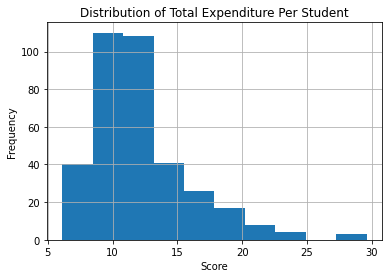

In [318]:
df['TOTAL_EXPENDITURE_PER_STUDENT'].hist()
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Expenditure Per Student')

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<AxesSubplot:xlabel='TOTAL_EXPENDITURE_PER_STUDENT', ylabel='TOTAL_REVENUE_PER_STUDENT'>

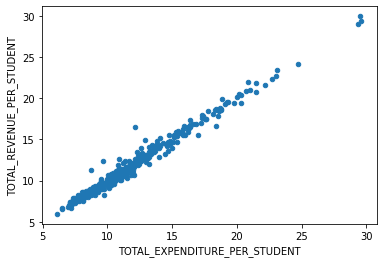

In [309]:
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT',y='TOTAL_REVENUE_PER_STUDENT')

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [376]:
from sklearn.model_selection import train_test_split as tts

In [402]:


x = df[['TOTAL_REVENUE_PER_STUDENT','TOTAL_EXPENDITURE_PER_STUDENT']]
X = x.dropna()
Y = df.loc[X.index]['AVG_MATH_8_SCORE']
y = Y.dropna()

In [403]:
X_train, X_test, y_train, y_test = tts(
     X, y, test_size=0.2, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [404]:
# import your sklearn class here,
from sklearn.linear_model import LinearRegression


In [405]:
# create your model here
model = LinearRegression() 


In [406]:

model.fit(X_train , y_train)

LinearRegression()

In [411]:
y_pred = model.predict(X_test)

model.score(X_test, y_test)

-0.2532413634685635

/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Average Math Scores for 8th Graders')

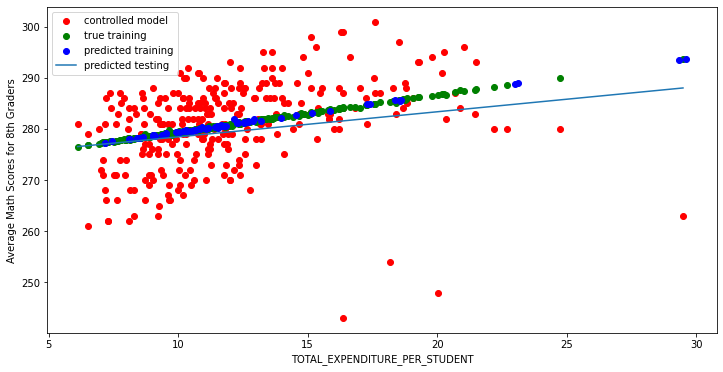

In [412]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average Math Scores for 8th Graders')

<h2> Summary </h2>

**The R^2 value was pretty low, so we can conclude that there was not much correlation. The true training trend seemed to somewhat follow that of the predicted training, however, the predicted testing trend was far off from the true training. This indicates that the variability in average math scores for 8th graders cannot be explained much by the total expenditure per student.**